# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

###Eigen Faces

Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images. **The eigenfaces themselves form a basis set of all images used to construct the covariance matrix.** This produces dimension reduction by allowing the smaller set of basis images to represent the original training images. Classification can be achieved by comparing how faces are represented by the basis set.The objective of this experiment is to understand how eigen faces can be used to represent the images

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [4]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W9_CS_Eigen_faces" #name of the notebook
Answer = "Ungraded"
def setup():

    ipython.magic("sx pip install imageio")
    ipython.magic("sx pip install scipy==1.2.1")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/BLR_Week3/faces.zip")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/BLR_Week3/output_new.zip")
    ipython.magic("sx unzip faces.zip")
    ipython.magic("sx unzip output_new.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


### Importing Required Packages

In [5]:
from scipy.misc import *
from scipy import linalg
import imageio
import glob
import numpy
import os
import pdb
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Function to load the images from the directory

In [6]:
def load_images(directory):
# get a list of all the picture filenames
    jpgs = glob.glob(directory + '/*')
    label_dict = {label:index for index, label in enumerate(numpy.unique([''.join(i.split('/')[-1].split('.')[0].split('_')[:-1]) for i in jpgs]))}
    #print(jpgs)
    labels = [label_dict[''.join(i.split('/')[-1].split('.')[0].split('_')[:-1])] for i in jpgs]
    # load a greyscale version of each image
    imgs = numpy.array([imresize(imread(i, True), (224, 224)).flatten() for i in jpgs])
    print(imgs.shape)
    return imgs, labels

### Function to Calculate the eigen faces, weights for each image and mean

In [7]:
def pca(data):
    mu = numpy.mean(data, 0)
    # mean adjust the data
    ma_data = data - mu
    # run SVD
    e_faces, sigma, v = linalg.svd(ma_data.transpose(), full_matrices=False)
    #pdb.set_trace()
    # compute weights for each image
    weights = numpy.dot(ma_data, e_faces)
    return e_faces, weights, mu, v

### Function to reconstruct the image . In this function we will be performing the dot product between weights and eigen face then adding the mean value.

In [8]:
def reconstruct(img_idx, e_faces, weights, mu, npcs):
    # dot weights with the eigenfaces and add to mean
    recon = mu + numpy.dot(weights[img_idx, 0:npcs], e_faces[:, 0:npcs].T)
    return recon

### Function to save the image into a directory named "image"

In [10]:
def save_image(out_dir, subdir, img_id, img_dims, data):
    directory = out_dir + "/" + subdir
    if not os.path.exists(directory): os.makedirs(directory)
    imsave(directory + "/image_" + str(img_id) + ".jpg", data.reshape(img_dims))

### Loading the new set of images

In [11]:
dir = "./faces"

In [12]:
data, labels = load_images(dir)

(200, 50176)


### Calling the PCA function and storing the eigen faces, weights and mean values

In [13]:
img_dims = (224,224)
e_faces, weights, mu,v = pca(data)
weights.shape

(200, 200)

In [14]:
X_train, y_train = weights, labels

###Applying Decision tree classifier

In [15]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [16]:
pred_labels = clf.predict(X_train)

###Calculating the performance metrics confusion matrix and accuracy score

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_train, pred_labels, normalize=True)

1.0

In [19]:
confusion_matrix(pred_labels, y_train)

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])

###Plot of data in 2D in Eigen space

In [20]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_train)
X_embedded.shape

(200, 2)

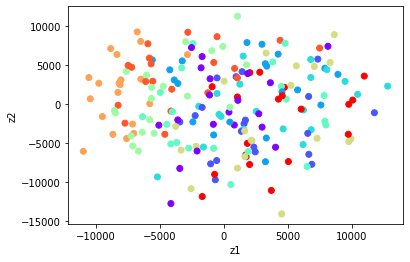

In [21]:
plt.scatter(weights[:, 0], weights[:, 1], c=labels, cmap='rainbow')
plt.xlabel('z1')
plt.ylabel('z2')
plt.savefig('Faces_in_2d.png')

### Eigen Value Spectrum

In [22]:
mu = numpy.mean(data, 0)
# mean adjust the data
ma_data = data - mu
Eigen_values, Eigen_vectors = numpy.linalg.eig(ma_data@ma_data.T)

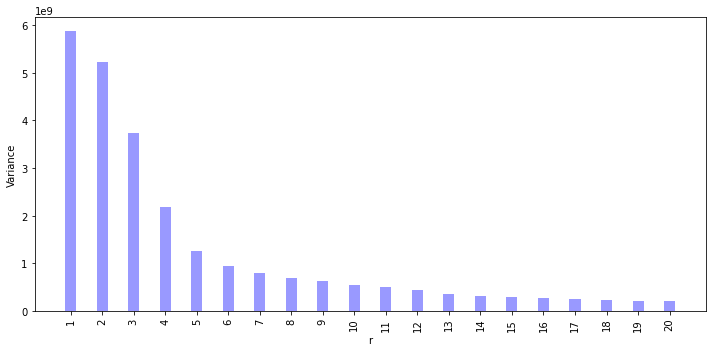

In [23]:
%matplotlib inline  

fig = plt.figure()
fig.set_size_inches(10,5)
index = numpy.arange(len(Eigen_values[:20]))
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index , Eigen_values[:20], bar_width,
                 alpha=opacity,
                 color='b',
                 #yerr=std_e1,
                 #error_kw=error_config,
                 label='Eigen value Spectrum')
plt.xticks(index, numpy.arange(Eigen_values.shape[0])+1,  rotation=90)
plt.xlabel('r')
plt.ylabel('Variance')
#plt.legend()

plt.tight_layout()
plt.savefig('Eigen_values_spectrum.png')
plt.show()

### Saving the mean image in output directory and displaying it

In [24]:
imsave("output_new" + "/mean.jpg", mu.reshape(img_dims))

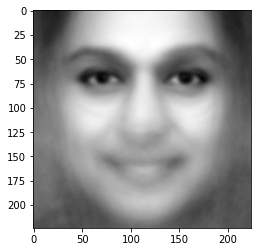

In [25]:
plt.grid(False)
plt.imshow(mu.reshape(224, 224), cmap='gray')

### Storing the eigen faces as images in directory named "output_new" and display them here

In [26]:
for i in range(e_faces.shape[1]):
    #continue
    save_image("output_new", "eigenfaces", i, img_dims, e_faces[:,i])

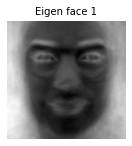

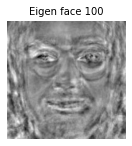

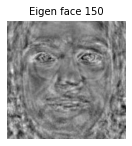

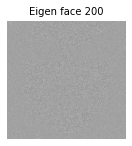

In [27]:
index = [0,99,149, 199]

for j, i in enumerate(index) :
    eigenface = "output_new/eigenfaces/image_"+str(i)+".jpg"
    title = "Eigen face " + str(i+1)
    plt.figure(figsize=(10,10))
    plt.subplot(len(index), j+1,1 )
    plt.axis('off')
    plt.imshow(imread(eigenface, True), cmap='gray')
    plt.title(title, size=10)
    plt.show()

### Checking the shape of a eigen face

In [28]:
e_faces[:, :].shape

(50176, 200)

### Select the number of principal components for reconstruction of images and visualizing them

In [29]:
img_id = 66

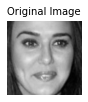

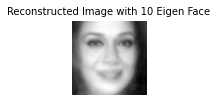

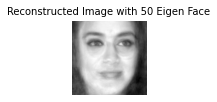

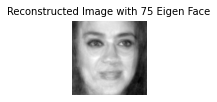

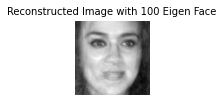

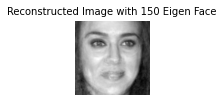

In [30]:
title = "Original Image" 
plt.figure(figsize=(3,3))
plt.subplot(2, 1,1)
plt.axis('off')
plt.imshow(data[img_id].reshape(224,224), cmap='gray')
plt.title(title, size=10)
#print(weights[img_id])
Normalised_weights = (weights[img_id]-numpy.mean(weights[img_id]))/numpy.std(weights[img_id])
#print(Normalised_weights)
for i in [9, 49,74,99,149]:
    img = reconstruct(img_id, e_faces, weights, mu, i)
    img_dims = (224,224)
    path = 'output_new/recon'
    imsave(path+"/recon"+str(i+1)+".jpg", img.reshape(img_dims))
    title = "Reconstructed Image with {} Eigen Face".format(i+1) 
    plt.figure(figsize=(3,3))
    plt.subplot(2, 1,1)
    plt.axis('off')
    plt.imshow(img.reshape(224,224), cmap='gray')
    plt.title(title, size=10)
    plt.show()

## Please answer the questions below to complete the experiment:

In [31]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [33]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "non" #@param {type:"string"}


In [34]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [35]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [36]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8456
Date of submission:  31 Oct 2020
Time of submission:  14:24:02
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
